# Anonymization and Machine Learning on NBA player dataset

### Generating Fake Data

We can generate fake data using Faker. This way, we can protect the PII like original name of persons by replacing them with the name that is generated by Faker. We will work with the 2018 NBA Salaries dataset. Let us first explore the dataset.

In [1]:
import pandas as pd
nba = pd.read_csv("dataset/2017-18_NBA_salary.csv")
print(nba.columns)
print(nba.dtypes)
nba.head()

Index(['Player', 'Salary', 'NBA_Country', 'NBA_DraftNumber', 'Age', 'Tm', 'G',
       'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM',
       'DBPM', 'BPM', 'VORP'],
      dtype='object')
Player              object
Salary               int64
NBA_Country         object
NBA_DraftNumber      int64
Age                  int64
Tm                  object
G                    int64
MP                   int64
PER                float64
TS%                float64
3PAr               float64
FTr                float64
ORB%               float64
DRB%               float64
TRB%               float64
AST%               float64
STL%               float64
BLK%               float64
TOV%               float64
USG%               float64
OWS                float64
DWS                float64
WS                 float64
WS/48              float64
OBPM               float64
DBPM               float64
BPM             

,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Zhou Qi,815615,China,43,22,HOU,16,87,0.6,0.303,...,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2
1,Zaza Pachulia,3477600,Georgia,42,33,GSW,66,937,16.8,0.608,...,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7
2,Zach Randolph,12307692,USA,19,36,SAC,59,1508,17.3,0.529,...,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0
3,Zach LaVine,3202217,USA,13,22,CHI,24,656,14.6,0.499,...,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1
4,Zach Collins,3057240,USA,10,20,POR,62,979,8.2,0.487,...,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2


Now let us replace the original names with Faker generated name. If this data weren't public, there would be a high risk of a re-identification attack. For example, since there is only one "Aaron Brooks" playing in the NBA, it could be possible to know other sensitive information like his exact salary per year. By removing personal names from the dataset, we can avoid potential damage to the people in it.

In [2]:
# Import the Faker class
from faker import Faker

# Initialize the generator
fake_data = Faker()

# Change names with new male names using a lambda function
nba['Player'] = nba['Player'].apply(lambda x:fake_data.unique.name_male())
# See the resulting pseudonymized data
print(nba.head())

             Player    Salary NBA_Country  NBA_DraftNumber  Age   Tm   G  \
0        Luis Smith    815615       China               43   22  HOU  16   
1  Glenn Williamson   3477600     Georgia               42   33  GSW  66   
2       Luis Bender  12307692         USA               19   36  SAC  59   
3      Brandon Diaz   3202217         USA               13   22  CHI  24   
4    Jared Mcdowell   3057240         USA               10   20  POR  62   

     MP   PER    TS%  ...  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM   BPM  \
0    87   0.6  0.303  ...  18.2  19.5 -0.4  0.1 -0.2 -0.121 -10.6   0.5 -10.1   
1   937  16.8  0.608  ...  19.3  17.2  1.7  1.4  3.1  0.160  -0.6   1.3   0.8   
2  1508  17.3  0.529  ...  12.5  27.6  0.3  1.1  1.4  0.046  -0.6  -1.3  -1.9   
3   656  14.6  0.499  ...   9.7  29.5 -0.1  0.5  0.4  0.027  -0.7  -2.0  -2.6   
4   979   8.2  0.487  ...  15.6  15.5 -0.4  1.2  0.8  0.038  -3.7   0.9  -2.9   

   VORP  
0  -0.2  
1   0.7  
2   0.0  
3  -0.1  
4  -0.

### Generating other informations

We can do the same for ssn and email so as to not give away the original ssn and email address. However, there are better ways to do this, by masking

In [3]:
nba['ssn'] = [fake_data.ssn() for _ in range(len(nba))]

# Generate random company domain emails with username as their name
nba['email'] = [x.replace(" ", "") + "@" + fake_data.domain_name()
                    for x in nba['Player']] 


### Masking sensitive PII

If the dataset contains Social Security numbers (SSN) of American citizens along with their city locations and age. If this was unreleased data only consented to be shared with us, when exposing it, a privacy breach would occur since you are disclosing data the subjects didn't expect us to share.

We will anonymize the data by applying partial masking to the Sensitive PII ssn. 

In [4]:
# Mask the SSN showing the first and last numbers
nba['ssn'] = nba['ssn'].apply(lambda x: x[0]+"****"+x[-1])
nba['email'] = nba['email'].apply(lambda x: x[0]+"****"+x[-4:])
nba.head()

,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,ssn,email
0,Luis Smith,815615,China,43,22,HOU,16,87,0.6,0.303,...,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2,6****0,L****.com
1,Glenn Williamson,3477600,Georgia,42,33,GSW,66,937,16.8,0.608,...,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7,0****4,G****.com
2,Luis Bender,12307692,USA,19,36,SAC,59,1508,17.3,0.529,...,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0,7****4,L****.com
3,Brandon Diaz,3202217,USA,13,22,CHI,24,656,14.6,0.499,...,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1,4****7,B****.biz
4,Jared Mcdowell,3057240,USA,10,20,POR,62,979,8.2,0.487,...,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2,4****9,J****.com


### Reducing identification risk with generalization


Now we will apply common generalization technique to produce binary values of a specific attribute.

We will transform the variable G to a binary column. The threshold to use for the transformation will be the median value rounded up.

In [8]:
import numpy as np
# Calculate the mean value of incomes
median_G = np.round(nba["G"].median())
print(median_G)
# Apply generalization by transforming to binary data
nba['G'] = nba['G'].apply(lambda x: 1 if x>=median_G else 0 )

# See resulting DataFrame
print(nba.head())

1.0
             Player    Salary NBA_Country  NBA_DraftNumber  Age   Tm  G    MP  \
0        Luis Smith    815615       China               43   22  HOU  0    87   
1  Glenn Williamson   3477600     Georgia               42   33  GSW  1   937   
2       Luis Bender  12307692         USA               19   36  SAC  1  1508   
3      Brandon Diaz   3202217         USA               13   22  CHI  0   656   
4    Jared Mcdowell   3057240         USA               10   20  POR  1   979   

    PER    TS%  ...  OWS  DWS   WS  WS/48  OBPM  DBPM   BPM  VORP     ssn  \
0   0.6  0.303  ... -0.4  0.1 -0.2 -0.121 -10.6   0.5 -10.1  -0.2  6****0   
1  16.8  0.608  ...  1.7  1.4  3.1  0.160  -0.6   1.3   0.8   0.7  0****4   
2  17.3  0.529  ...  0.3  1.1  1.4  0.046  -0.6  -1.3  -1.9   0.0  7****4   
3  14.6  0.499  ... -0.1  0.5  0.4  0.027  -0.7  -2.0  -2.6  -0.1  4****7   
4   8.2  0.487  ... -0.4  1.2  0.8  0.038  -3.7   0.9  -2.9  -0.2  4****9   

       email  
0  L****.com  
1  G****.com  
2

### Top and bottom coding 


Top and bottom coding allow us to hide outliers and reduce the risk of identification without reducing data utility. Since outliers are rare variables, along with other quasi-identifiers, sometimes it becomes predictable to identify a person which may pose potential risk.

We are going to use nba data and apply the top and bottom technique for the column salary. Let us first visualize the distribution with histogram.


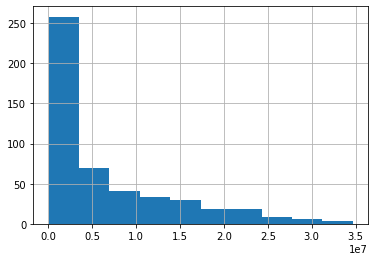

In [9]:
import matplotlib.pyplot as plt
# Plot a histogram of salaries
nba['Salary'].hist()
plt.show()


We will now calculate IQR for Salary column and use it to identify the outliers and apply top-coding and bottom-coding technique to replace them with edge values

In [10]:
Q1 = nba['Salary'].quantile(0.25)
Q3 = nba['Salary'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Determine the acceptable range (fences)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Top code the salaries to upper bound
nba.loc[nba['Salary'] >= upper_bound, 'Salary'] = upper_bound

# Bottom code the salaries to lower bound
nba.loc[nba['Salary'] <= lower_bound, 'Salary'] = lower_bound



Let us now visualize the updated histogram

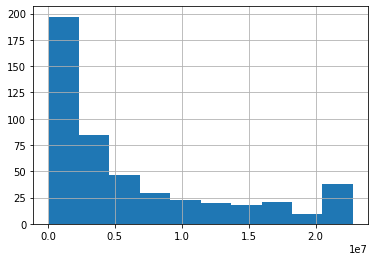

In [11]:
nba['Salary'].hist()
plt.show()
